# Selecting videos for human experiments

Human experiments are defined here: https://docs.google.com/document/d/1KQVQMISMA1ynlrSTptcFxSlSiocqg5iK6FD8zUK8SCE/edit?usp=sharing

In [5]:
# Imports

import os
import sys
import json
import cv2
import matplotlib.pyplot as plt
import warnings
# import face_recognition

In [2]:
!nvidia-smi

Wed May 27 07:31:36 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 440.82       CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  TITAN RTX           On   | 00000000:1A:00.0 Off |                  N/A |
| 41%   36C    P8    27W / 280W |   3241MiB / 24220MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  TITAN RTX           On   | 00000000:68:00.0  On |                  N/A |
| 41%   46C    P5    40W / 280W |   2990MiB / 24217MiB |     18%      Default |
+-------------------------------+----------------------+----------------------+
        

In [3]:
%%bash
cd ../../../../datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_10/
ls

aajtsolpjq.mp4
aaqadjweuz.mp4
aaxzsfqvxv.mp4
aaytftgoxe.mp4
abdhebzuzt.mp4
abmtcpjxdi.mp4
abymaaihkj.mp4
acajitpqte.mp4
acbtslwclk.mp4
accfhmtiuj.mp4
acljgkyckk.mp4
acocfksxwg.mp4
acvpuukcwl.mp4
acydhcvpnx.mp4
aczsrttjzb.mp4
adilspamjj.mp4
aditupkylq.mp4
adybwllgkj.mp4
adywyvayvj.mp4
aearhnatoj.mp4
aemdhhvdbm.mp4
aeqengxxrg.mp4
aeqfnecrcb.mp4
aerihvkxyj.mp4
aetcdsmpld.mp4
aeuzjqawlf.mp4
aezgmksjlx.mp4
afbgivckik.mp4
afrdnpridi.mp4
afrhfiziqx.mp4
afscljojpo.mp4
aftqqmiysd.mp4
afuumscrle.mp4
afzxoznquw.mp4
agdtcltibk.mp4
aggwnlepuy.mp4
aglwqifqwf.mp4
agofgfcuuv.mp4
agtgoythda.mp4
ahlzkwgzan.mp4
ahosxsezvx.mp4
ahqwhhmpbn.mp4
aismvzujjr.mp4
ajblihrqat.mp4
ajdegythla.mp4
ajijqswcwv.mp4
ajoogzihog.mp4
akefewcntz.mp4
akmwivcaly.mp4
akobxwitbe.mp4
akomkhnosr.mp4
akqtiabugz.mp4
aliygnpssy.mp4
alnwhmtbub.mp4
alwygsjrlx.mp4
ameddrsrnu.mp4
amedqjisns.mp4
amkrhiojmr.mp4
amllysholf.mp4
amnnindvzc.mp4
amoklvhphe.mp4
amtlkbydwn.mp4
anbtdrguum.mp4
ansbricyzg.mp4
aodwixxwxl.mp4
aordhrhhun.mp4
aoslehqsra

In [4]:
data_path = '/data/vision/oliva/scratch/datasets/DeepfakeDetection/'

In [5]:
from timeit import default_timer as timer
start = timer()
metadata = json.load(open(os.path.join(data_path, "metadata.json")))
end = timer()
print(end-start)

56.205353163182735


In [6]:
print(len(metadata))
print(metadata['dfdc_train_part_30']['bpuhrkvgyj.mp4'].keys())
print(metadata['dfdc_train_part_30']['bpuhrkvgyj.mp4']['path'])

44
dict_keys(['label', 'face_data', 'filename', 'split', 'path'])
dfdc_train_part_30/bpuhrkvgyj.mp4


In [8]:
    
def check_for_faces(video, n_frames_to_check=10, verbose = False):
    cap = cv2.VideoCapture(video)
    
    if not cap.get(cv2.CAP_PROP_FRAME_COUNT):
        if verbose: print("Video has 0 frames", video)
        return False
    
    frames_remaining = True
    has_faces = True
    c=0
    check_every = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))//n_frames_to_check
    face_counter=0
    
    if verbose: print("Checking every:", check_every)
    
    while frames_remaining:
        flag = cap.grab()
        
        
        if not c % check_every:
            flag, frame = cap.retrieve()
        else:
            c+=1
            continue
            
        if flag:
            face_locations = face_recognition.face_locations(frame)
            
            if verbose: print("face_locations",face_locations)
            if not face_locations:
                pass
#                 print("NO FACE DETECTED")
            else:
                face_counter+=1
#                 print("FACE DETECTED")
        else:
            frames_remaining = False
            if verbose: print("No more frames on video %s" % video)
           
        c+=1
    if verbose: print("Found %d out of %d faces" % (face_counter, n_frames_to_check))
    if face_counter/n_frames_to_check >= 0.7:
        return True
    return False

check_for_faces(os.path.join(data_path,'facenet_smooth_frames/dfdc_train_part_10/ahqwhhmpbn.mp4/face_0.mp4'), verbose = True)

Checking every: 30
face_locations []
face_locations []
face_locations []
face_locations []
face_locations []
face_locations [(82, 319, 350, 52)]
face_locations []
face_locations [(52, 349, 320, 82)]
face_locations []
face_locations []
No more frames on video /data/vision/oliva/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_10/ahqwhhmpbn.mp4/face_0.mp4
Found 2 out of 10 faces


False

In [6]:
def plot_frames(path, title=''):
    print(path)
    cap = cv2.VideoCapture(path)
    flag, frame = cap.read()
    if not flag:
        raise Exception("Path %s not found" % path)
    plt.imshow(frame[...,::-1])
    plt.title(title)
    plt.show()

def select_vids_for_exp1(data_path, 
                         metadata, 
                         path_prefix='', 
                         path_suffix='', 
                         n_pairs=5, 
                         get_matching_pairs=False, 
                         verbose=False):
    '''
    Goes through the DFDC vids in data_path and puts n_pairs pairs into a fake and a real list.
    '''

    vids = {'real':[], 'fake':[]}
    full=False
    
    # Looks in every folder in the data_path. In current data setup, folders are usually called "dfdc_train_part_X"
    for folder in os.listdir(os.path.join(data_path, path_prefix)):
        if folder not in metadata:
            continue
            
        print("\nCrawling %s" % folder)
        
        # Looks at every vid in the given folder. Variable "vid" is usually a folder, 
        # and inside a face_0.mp4 video file contains the actual data.
        for vid in os.listdir(os.path.join(data_path, path_prefix, folder)):
            if vid not in metadata[folder]:
                continue
                
            # Extract video sub-dictionary with label information
            v = metadata[folder][vid]
            if verbose: print("Looking at video:", vid)
            
            # Build full video path
            video_path = os.path.join(data_path, path_prefix, v['path'], path_suffix)
            
            # Check if path exists
            if verbose: print("Checking if path %s exists..." % video_path)
            if not os.path.exists(video_path):
                if verbose: print("Path does not exist, skipping")
                continue
            
            # Print label and plot first frame if verbose
            if verbose:
                print("Label for this video:", v['label'])
                plot_frames(video_path)
            
            
            if v['label'] == 'REAL' and len(vids['real'])<n_pairs:
                if verbose: print("Checking for faces...")
                if not check_for_faces(video_path, verbose=verbose):
                    print("Video has not passed face check: %s" % video_path)
                    continue

                vids['real'].append(os.path.join(path_prefix, v['path'], path_suffix))

            if v['label'] == 'FAKE' and len(vids['fake'])<n_pairs:
                if verbose: print("Checking for faces...")
                if not check_for_faces(video_path, verbose=verbose):
                    print("Video has not passed face check: %s" % video_path)
                    continue

                vids['fake'].append(os.path.join(path_prefix, v['path'], path_suffix))

            if len(vids['real'])>=n_pairs and len(vids['fake'])>=n_pairs:
                full=True
                break
        
        print("%d/%d real and %d/%d fake videos gathered so far" 
              % (len(vids['real']), n_pairs, len(vids['fake']), n_pairs))
        if full:
            break
              
    if not full:
        print("WARNING: Vids array did not get filled.")

    return vids

# vids_for_exp1 = select_vids_for_exp1(data_path, 
#                                      metadata, 
#                                      n_pairs=1000, 
#                                      path_prefix = 'facenet_smooth_frames',
#                                      path_suffix = 'face_0.mp4',
#                                      verbose=False)

In [ ]:
def create_json_file_exp1(vids, n_runs=100, n_pairs_per_run=10, save=True, output_path=None):
    '''
    Creates json file to be used in Exp1.
    Each element in the json will be a level or run: 
    a sequence of 10 pairs shown one after the other.
    
    Inputs:
    ------
    vids: a dictionary with two keys, real and fake, 
        holding two lists of video paths corresponding to the 
        real and fake videos to put in the json.
    
    Returns:
    -------
    json_file: a file holding a large dictionary of length n_runs
        with the following format:
        {
        1: [{real:url1, fake:url2}, {real:url3, fake:url4}, ...], 
        2: [{real:url1, fake:url2}, {real:url3, fake:url4}, ...],
        ...
        }
    '''
    
    json_file = {r:[] for r in range(n_runs)}
    c=0
    
    for r in range(n_runs):
        for p in range(n_pairs_per_run):
            if c >= len(vids['real']) or c>= len(vids['fake']):
                print("Asked to generate %d runs with %d pairs per run, but only %d pairs are available." % (n_runs, n_pairs_per_run, c))
                print("Breaking. Number of runs generated: %d" % r)
                del json_file[r]
                break
            url_real = get_url(vids['real'][c])
            url_fake = get_url(vids['fake'][c])
#             print("REAL:")
#             print(url_real)
#             print("FAKE:")
#             print(url_fake)
#             print()
            rf = {'real': url_real, 'fake': url_fake}
            json_file[r].append(rf)
            c += 1
        else:
            continue
        break
        
    print("Generated %d runs with %d pairs per run." % (len(json_file), n_pairs_per_run))
    if save:
        
        if not output_path:
            output_path = "runs_for_exp1_nr%d_np%d.json" % (len(json_file), n_pairs_per_run)
        
        with open(output_path, "w+") as f:
            json.dump(json_file, f)
    return json_file

def get_url(vid_path):
    return 'http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/' + vid_path


json_file = create_json_file_exp1(vids_for_exp1, n_runs = 10, n_pairs_per_run=20)

In [76]:
json_file

{0: [{'fake': 'http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_17/ajeeslbztj.mp4/face_0.mp4',
   'real': 'http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_17/agkxvmtyfj.mp4/face_0.mp4'},
  {'fake': 'http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_17/adioaqyble.mp4/face_0.mp4',
   'real': 'http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_17/aaragvjucp.mp4/face_0.mp4'},
  {'fake': 'http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_17/afvwwfbjhn.mp4/face_0.mp4',
   'real': 'http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frames/dfdc_train_part_17/afmhdngiib.mp4/face_0.mp4'},
  {'fake': 'http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_smooth_frame

# Create json file for exp2

Loading original labels
Expecting value: line 12 column 13 (char 333)
JSON ERROR (file ../results/DeepfakeDetection_videos_dfdc_train_part_21_faceforensics_pretrained_xception_all_c23_step_15.json)
Expecting value: line 12 column 13 (char 332)
JSON ERROR (file ../results/DeepfakeDetection_videos_dfdc_train_part_33_faceforensics_pretrained_xception_all_c23_step_15.json)
Expecting value: line 12 column 13 (char 332)
JSON ERROR (file ../results/DeepfakeDetection_videos_dfdc_train_part_34_faceforensics_pretrained_xception_all_c23_step_15.json)
'utf-8' codec can't decode byte 0xee in position 17: invalid continuation byte
JSON ERROR (file ../results/.DeepfakeDetection_videos_dfdc_train_part_19_faceforensics_pretrained_xception_all_c23_step_15.json.swp)
Expecting value: line 12 column 13 (char 333)
JSON ERROR (file ../results/DeepfakeDetection_videos_dfdc_train_part_28_faceforensics_pretrained_xception_all_c23_step_15.json)
Total error jsons: 5
len(fakes), len(reals) 92253 17608


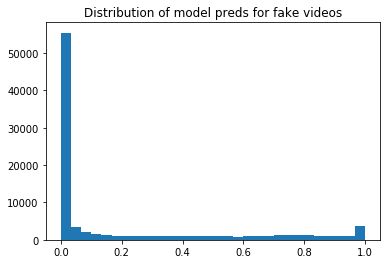

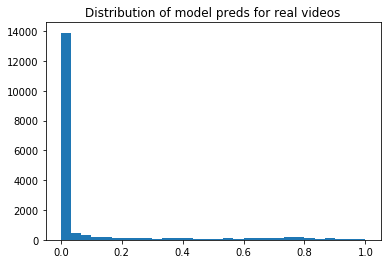


{0: ['http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_videos/dfdc_train_part_3/shkhgtqgze.mp4', 'http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_videos/dfdc_train_part_47/yaurmteyna.mp4', 'http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_videos/dfdc_train_part_14/ojzwrwwyio.mp4', 'http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_videos/dfdc_train_part_14/shozdlrpxa.mp4', 'http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_videos/dfdc_train_part_14/fwtmmkthxf.mp4', 'http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_videos/dfdc_train_part_41/upvvwkppgn.mp4', 'http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_videos/dfdc_train_part_46/zrwasstqou.mp4', 'http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_videos/dfdc_train_part_14/fodpdbzkpi.mp4', 'http://visiongpu23.csail.mit.edu/s

In [37]:
import os
import json
import cv2
import matplotlib.pyplot as plt
import numpy as np


def create_fake_real_prob_lists(result_files, plot_vid = False, data_dir='.'):
    fakes = {}
    reals = {}
    
    errors = 0
    
    print("Loading original labels")
    orig_labels = json.load(open("/home/camilo/Datasets/DeepfakeDetection/metadata.json", "r"))
    
    for f in result_files:
        try:
            res = json.load(open(f, 'r+'))
        except Exception as e:
            print(e)
            print("JSON ERROR (file %s)" % f)
            errors+=1
            continue
        
        part_number = f.split('_')[5]
        part_labels = orig_labels['dfdc_train_part_'+part_number ]
        
        for vid_name, lp in res['outputs'].items():
            
            if plot_vid:
                plot_frames(os.path.join(data_dir, vid_name, 'face_0.mp4'), 
                            title=vid_name+ ' label %d, prob %.4f' % (lp['label'], lp["prob"]))
                
            if part_labels[vid_name.split('/')[-1]]['label'] == 'FAKE': # if it's a deepfake
                fakes[vid_name] = lp['prob']
            elif part_labels[vid_name.split('/')[-1]]['label'] == 'REAL':
                reals[vid_name] = lp['prob']
    
    print("Total error jsons:",errors)
    print("len(fakes), len(reals)", len(fakes), len(reals))
    
    plt.hist(fakes.values(), bins = 30)
    plt.title("Distribution of model preds for fake videos")
    plt.show()
    
    plt.hist(reals.values(), bins = 30)
    plt.title("Distribution of model preds for real videos")
    plt.show()
    return fakes, reals

def get_shuffled_urls(sorted_fakes_names, 
                      n_urls_to_get=None, 
                      step = 10,
                      url_base = 'http://visiongpu23.csail.mit.edu/scratch/datasets/DeepfakeDetection/facenet_videos/'):
#     permuted_names = np.random.permutation(sorted_fakes_names)
    
    urls = [url_base+name for name in sorted_fakes_names]
    
    if not n_urls_to_get:
        return urls
    else:
        return [urls[n] for n in range(0, n_urls_to_get*step, step)]
            

def visualize_top_bottom_preds(sorted_fakes_names, 
                               fakes_probs, 
                               data_dir = '/home/camilo/Datasets/DeepfakeDetection/facenet_videos', 
                               n_to_show = 30,
                               ):
    
    print("\n\n\nVisualizing most missclassified fakes")
    step = 10
    for n in range(0, n_to_show*step, step):
        plot_frames(os.path.join(data_dir, sorted_fakes_names[n], 'face_0.mp4'), 
                    title="Fake video. Pred: %.5f" % fakes_probs[sorted_fakes_names[n]])
        plt.show()
    print("Visualizing most correctly classified fakes")
    for n in range(0, n_to_show*step, step):
        plot_frames(os.path.join(data_dir, sorted_fakes_names[-(n+1)], 'face_0.mp4'), 
                    title="Fake video (label 0). Pred: %.5f" % fakes_probs[sorted_fakes_names[-(n+1)]])
        plt.show()

def create_json_file_exp2(result_files, 
                          json_output_folder = '../../df_click/src', 
                          plot_vid=True, 
                          data_dir = '.', 
                          n_levels_per_json = 5, 
                          n_videos_per_level=10,
                          n_jsons=10):
    
    fakes_probs, reals_probs = create_fake_real_prob_lists(result_files, plot_vid = plot_vid, data_dir = data_dir)
            
    # Sorts so that fakes missclassified with largest error are at the beginning of the array
    sorted_fakes_names = sorted(fakes_probs, key=fakes_probs.get)

#     visualize_top_bottom_preds(sorted_fakes_names, fakes_probs)

    c=0
    n_urls_to_get = n_levels_per_json*n_videos_per_level*n_jsons
    vid_urls = get_shuffled_urls(sorted_fakes_names, n_urls_to_get)
    
    for n_j in range(n_jsons):
        lev_dict = {}
        for l in range(n_levels_per_json):
            lev_dict[l]=[]
            for v in range(n_videos_per_level):
                lev_dict[l].append(vid_urls[c])
                c+=1
        print()
        print(lev_dict)
        json_name = 'new_exp2_5levels_id%d.json' % n_j
        print("Saving json %s" % json_name)
        with open(os.path.join(json_output_folder, json_name), "w+") as f:
            json.dump(lev_dict,f)

data_dir = '/home/camilo/Datasets/DeepfakeDetection/facenet_videos'
result_path = '../results'
key_str = 'DeepfakeDetection_videos_dfdc_train_part_'
result_files = [os.path.join(result_path, f) for f in os.listdir(result_path) if key_str in f]
create_json_file_exp2(result_files, data_dir=data_dir, plot_vid=False)